In [463]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
train = pd.read_csv("./_data/train.csv")
job_tags = pd.read_csv("./_data/job_tags.csv")
user_tags = pd.read_csv("./_data/user_tags.csv")
tags = pd.read_csv("./_data/tags.csv")
job_companies =  pd.read_csv("./_data/job_companies.csv")
test_job = pd.read_csv("./_data/test_job.csv")

In [464]:
len(train['userID'].unique()) # user 196명,

196

In [465]:
len(train['jobID'].unique()) # 공고 708개

708

In [466]:
#지원 안하는 공고가 훨씬 많음.
train['applied'].value_counts()

0    5143
1     857
Name: applied, dtype: int64

In [467]:
train

,userID,jobID,applied
0,fe292163d06253b716e9a0099b42031d,15de21c670ae7c3f6f3f1f37029303c9,0
1,6377fa90618fae77571e8dc90d98d409,55b37c5c270e5d84c793e486d798c01d,0
2,8ec0888a5b04139be0dfe942c7eb4199,0fcbc61acd0479dc77e3cccc0f5ffca7,1
3,f862b39f767d3a1991bdeb2ea1401c9c,3b5dca501ee1e6d8cd7b905f4e1bf723,0
4,cac14930c65d72c16efac2c51a6b7f71,287e03db1d99e0ec2edb90d079e142f3,0
...,...,...,...
5995,68cb94b97d00979f4e8127915885b641,b9228e0962a78b84f3d5d92f4faa000b,0
5996,c0b199d73bdf390c2f4c3150b6ee1574,e3796ae838835da0b6f6ea37bcf8bcb7,0
5997,3ab88dd28f749fe4ec90c0b6f9896eb5,e2a2dcc36a08a345332c751b2f2e476c,0
5998,75b4af0dacbc119eadf4eeb096738405,3b712de48137572f3849aabd5666a4e3,0


In [468]:
len(test_job['userID'].unique()) # user 196명,

196

In [469]:
len(test_job['jobID'].unique()) # 591 개의 공고

591

In [470]:
# 즉 user 196명이 train으로 주어진 공고 이외의 다른 공고에 지원한다/안한다를 예측하는 모델 만들기

In [471]:
# 각 공고에 달려있는 태그 가져오기
job_tags_dict = {}
for k, v in zip(job_tags['jobID'], job_tags['tagID']):
    if k in job_tags_dict.keys():
        job_tags_dict[k].append(v)
    else:
        job_tags_dict[k] = [v]

In [472]:
len(job_tags_dict)    #테스트 포함 모든 공고 733개가 있는듯

733

In [473]:
user_tags

,userID,tagID
0,e576423831e043f7928d9ac113abbe6f,82c2559140b95ccda9c6ca4a8b981f1e
1,e576423831e043f7928d9ac113abbe6f,2ba8698b79439589fdd2b0f7218d8b07
2,e576423831e043f7928d9ac113abbe6f,351b33587c5fdd93bd42ef7ac9995a28
3,e576423831e043f7928d9ac113abbe6f,81e5f81db77c596492e6f1a5a792ed53
4,e576423831e043f7928d9ac113abbe6f,0e095e054ee94774d6a496099eb1cf6a
...,...,...
17189,3ab88dd28f749fe4ec90c0b6f9896eb5,801c14f07f9724229175b8ef8b4585a8
17190,3ab88dd28f749fe4ec90c0b6f9896eb5,95151403b0db4f75bfd8da0b393af853
17191,3ab88dd28f749fe4ec90c0b6f9896eb5,f47330643ae134ca204bf6b2481fec47
17192,15d84e9a5eceb67bcb8fb0e8c839a903,285f89b802bcb2651801455c86d78f2a


In [474]:
# user가 설정한 태그 가져오기
user_tags_dict = {}
for k, v in zip(user_tags['userID'], user_tags['tagID']):
    if k in user_tags_dict.keys():
        user_tags_dict[k].append(v)
    else:
        user_tags_dict[k] = [v]

In [475]:
#태그 아이디에 해당하는 키워드... 굳이 바꿀필요 없을듯..?
tags

,tagID,keyword
0,602d1305678a8d5fdb372271e980da6a,Amazon Web Services(AWS)
1,e3251075554389fe91d17a794861d47b,Tensorflow
2,a1d50185e7426cbb0acad1e6ca74b9aa,Docker
3,884d79963bd8bc0ae9b13a1aa71add73,Git
4,4122cb13c7a474c1976c9706ae36521d,Python
...,...,...
882,818f4654ed39a1c147d1e51a00ffb4cb,활용
883,7cce53cf90577442771720a370c3c723,mybais
884,c2aee86157b4a40b78132f1e71a9e6f1,*
885,1fb2a1c37b18aa4611c3949d6148d0f8,Autodesk Maya


In [476]:
# 회사 정보. 지원자마다 companySize 에 영향을 받을 수도?
job_companies

,companyID,jobID,companySize
0,00411460f7c92d2124a67ea0f4cb5f85,e5f6ad6ce374177eef023bf5d0c018b6,NaN
1,1905aedab9bf2477edc068a355bba31a,185e65bc40581880c4f2c82958de8cfe,11-50
2,89fcd07f20b6785b92134bd6c1d0fa42,0537fb40a68c18da59a35c2bfe1ca554,101-200
3,acf4b89d3d503d8252c9c4ba75ddbf6d,b7ee6f5f9aa5cd17ca1aea43ce848496,1-10
4,fb7b9ffa5462084c5f4e7e85a093e6d7,efe937780e95574250dabe07151bdc23,NaN
...,...,...,...
728,b5dc4e5d9b495d0196f61d45b26ef33e,fa3a3c407f82377f55c19c5d403335c7,51-100
729,2dace78f80bc92e6d7493423d729448e,d7a728a67d909e714c0774e22cb806f2,51-100
730,443cb001c138b2561a0d90720d6ce111,d81f9c1be2e08964bf9f24b15f0e4900,NaN
731,b5b41fac0361d157d9673ecb926af5ae,ae0eb3eed39d2bcef4622b2499a05fe6,NaN


In [477]:
companySize = {}
for key, value in zip(job_companies['jobID'],job_companies['companySize']):
    companySize[key] = value

In [478]:
# companySize 열을 만들어서 각 공고에 해당하는 회사 정보 추가
train['companySize']=''
for i in range(len(train)):
    train.loc[i,'companySize'] = companySize[train['jobID'][i]]

In [479]:
train

,userID,jobID,applied,companySize
0,fe292163d06253b716e9a0099b42031d,15de21c670ae7c3f6f3f1f37029303c9,0,11-50
1,6377fa90618fae77571e8dc90d98d409,55b37c5c270e5d84c793e486d798c01d,0,101-200
2,8ec0888a5b04139be0dfe942c7eb4199,0fcbc61acd0479dc77e3cccc0f5ffca7,1,NaN
3,f862b39f767d3a1991bdeb2ea1401c9c,3b5dca501ee1e6d8cd7b905f4e1bf723,0,11-50
4,cac14930c65d72c16efac2c51a6b7f71,287e03db1d99e0ec2edb90d079e142f3,0,51-100
...,...,...,...,...
5995,68cb94b97d00979f4e8127915885b641,b9228e0962a78b84f3d5d92f4faa000b,0,11-50
5996,c0b199d73bdf390c2f4c3150b6ee1574,e3796ae838835da0b6f6ea37bcf8bcb7,0,51-100
5997,3ab88dd28f749fe4ec90c0b6f9896eb5,e2a2dcc36a08a345332c751b2f2e476c,0,101-200
5998,75b4af0dacbc119eadf4eeb096738405,3b712de48137572f3849aabd5666a4e3,0,51-100


In [480]:
# tags_ratio 열을 만들어서 user_tags랑 job_tags 일치하는 비율 계산
for i in range(len(train)):
    train.loc[i,'job_tags'] = ' '.join(job_tags_dict[train['jobID'][i]])
    train.loc[i,'user_tags'] = ' '.join(user_tags_dict[train['userID'][i]])

In [481]:
len(train.loc[train['userID']=='fe292163d06253b716e9a0099b42031d', 'user_tags'][0].split())

151

In [482]:
# 태그가 왜이렇게 많은가 했더니 중복된 태그가 많네요
len(set(train.loc[train['userID']=='fe292163d06253b716e9a0099b42031d', 'user_tags'][0].split()))

13

In [483]:
for i in range(len(train)):
    in_user_tags = set(train['user_tags'][i].split())
    in_job_tags = set(train['job_tags'][i].split())
    train.loc[i,'tag_ratio'] = len(in_user_tags&in_job_tags)/len(in_user_tags)
    train.loc[i,'user_tags'] = len(in_user_tags)

In [376]:
train.drop(columns=['job_tags'], axis=1, inplace=True)

In [484]:
train

,userID,jobID,applied,companySize,job_tags,user_tags,tag_ratio
0,fe292163d06253b716e9a0099b42031d,15de21c670ae7c3f6f3f1f37029303c9,0,11-50,a9078e8653368c9c291ae2f8b74012e7 d38901788c533...,13,0.000000
1,6377fa90618fae77571e8dc90d98d409,55b37c5c270e5d84c793e486d798c01d,0,101-200,d6723e7cd6735df68d1ce4c704c29a04 4122cb13c7a47...,25,0.040000
2,8ec0888a5b04139be0dfe942c7eb4199,0fcbc61acd0479dc77e3cccc0f5ffca7,1,NaN,3bf55bbad370a8fcad1d09b005e278c2 aace49c7d8076...,7,0.142857
3,f862b39f767d3a1991bdeb2ea1401c9c,3b5dca501ee1e6d8cd7b905f4e1bf723,0,11-50,0e095e054ee94774d6a496099eb1cf6a e034fb6b66aac...,17,0.176471
4,cac14930c65d72c16efac2c51a6b7f71,287e03db1d99e0ec2edb90d079e142f3,0,51-100,4122cb13c7a474c1976c9706ae36521d 81dc9bdb52d04...,20,0.050000
...,...,...,...,...,...,...,...
5995,68cb94b97d00979f4e8127915885b641,b9228e0962a78b84f3d5d92f4faa000b,0,11-50,f47330643ae134ca204bf6b2481fec47 0e095e054ee94...,29,0.068966
5996,c0b199d73bdf390c2f4c3150b6ee1574,e3796ae838835da0b6f6ea37bcf8bcb7,0,51-100,81dc9bdb52d04dc20036dbd8313ed055 884d79963bd8b...,25,0.120000
5997,3ab88dd28f749fe4ec90c0b6f9896eb5,e2a2dcc36a08a345332c751b2f2e476c,0,101-200,b20bb95ab626d93fd976af958fbc61ba c8ba76c279269...,14,0.142857
5998,75b4af0dacbc119eadf4eeb096738405,3b712de48137572f3849aabd5666a4e3,0,51-100,0e095e054ee94774d6a496099eb1cf6a 81dc9bdb52d04...,7,0.142857


In [378]:
test_job['job_tags']=''
test_job['user_tags']=''
for i in range(len(test_job)):
    test_job.loc[i,'job_tags'] = ' '.join(job_tags_dict[test_job['jobID'][i]])
    test_job.loc[i,'user_tags'] = ' '.join(user_tags_dict[test_job['userID'][i]])

In [379]:
for i in range(len(test_job)):
    in_user_tags = set(test_job['user_tags'][i].split())
    in_job_tags = set(test_job['job_tags'][i].split())
    test_job.loc[i,'tag_ratio'] = len(in_user_tags&in_job_tags)/len(in_user_tags)
    test_job.loc[i,'user_tags'] = len(in_user_tags)

In [380]:
test_job.insert(2, 'companySize', '')

In [381]:
for i in range(len(test_job)):
    test_job.loc[i,'companySize'] = companySize[test_job['jobID'][i]]

In [382]:
test_job.drop(['job_tags'],axis=1, inplace=True)

In [383]:
test_job

,userID,jobID,companySize,user_tags,tag_ratio
0,ebaee1af0c501f22ddfe242fc16dae53,352407221afb776e3143e8a1a0577885,11-50,13,0.230769
1,9ab05403ac7808cbfba3da26665f7a9c,96b9bff013acedfb1d140579e2fbeb63,51-100,12,0.083333
2,33349e909eba71677299d2fc97e158b7,58d4d1e7b1e97b258c9ed0b37e02d087,11-50,6,0.166667
3,ac985a9db5faeb44c94a334430ccc241,ccb0989662211f61edae2e26d58ea92f,11-50,5,0.000000
4,d41e0e6f6f1e29098d9d152511503ab2,4a213d37242bdcad8e7300e202e7caa4,11-50,11,0.000000
...,...,...,...,...,...
2430,01ed443356f762e9132b58f8c80e131d,26e359e83860db1d11b6acca57d8ea88,201-500,14,0.000000
2431,946aa0c612952da8d67dd338a43d5929,c0f168ce8900fa56e57789e2a2f2c9d0,NaN,6,0.333333
2432,ce840aa9583592e71f3db26ee6e41703,8065d07da4a77621450aa84fee5656d9,11-50,17,0.117647
2433,946aa0c612952da8d67dd338a43d5929,a0160709701140704575d499c997b6ca,11-50,6,0.166667


In [159]:
job_companies['companySize'].unique() #원핫인코딩

array([nan, '11-50', '101-200', '1-10', '51-100', '1000 이상', '201-500',
       '501-1000'], dtype=object)

In [384]:
train = pd.get_dummies(train[['userID', 'jobID', 'user_tags','tag_ratio','companySize','applied']], columns=['companySize'])
test_job = pd.get_dummies(test_job[['userID', 'jobID', 'user_tags','tag_ratio','companySize']], columns=['companySize'])

In [385]:
train.drop(['jobID'],axis=1, inplace=True)
test_job.drop(['jobID'],axis=1, inplace=True)

In [334]:
test_job

,userID,user_tags,tag_ratio
0,ebaee1af0c501f22ddfe242fc16dae53,13,0.230769
1,9ab05403ac7808cbfba3da26665f7a9c,12,0.083333
2,33349e909eba71677299d2fc97e158b7,6,0.166667
3,ac985a9db5faeb44c94a334430ccc241,5,0.000000
4,d41e0e6f6f1e29098d9d152511503ab2,11,0.000000
...,...,...,...
2430,01ed443356f762e9132b58f8c80e131d,14,0.000000
2431,946aa0c612952da8d67dd338a43d5929,6,0.333333
2432,ce840aa9583592e71f3db26ee6e41703,17,0.117647
2433,946aa0c612952da8d67dd338a43d5929,6,0.166667


In [388]:
applied = train.groupby(['userID'], as_index=False).sum()
applied

,userID,tag_ratio,applied,companySize_1-10,companySize_1000 이상,companySize_101-200,companySize_11-50,companySize_201-500,companySize_501-1000,companySize_51-100
0,0004289ee1c7b8b08c77e19878106ae3,2.882353,8,1,0,3,22,2,0,3
1,00dd1479a58930a357e7b4e2ab4c9f33,3.230769,7,1,2,3,9,1,0,3
2,015b469419f616144c13e0194f880af7,0.500000,1,0,0,0,2,0,0,0
3,01ed443356f762e9132b58f8c80e131d,4.428571,5,1,3,2,6,2,0,2
4,03c60b7fc8519077914166ebcfbd6a34,3.000000,4,0,0,0,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...
191,f98e712b83a95b07ef771150ecee9cd4,1.818182,4,0,3,2,3,0,0,2
192,fa2a28ade168508972790316e314d47e,3.600000,2,5,1,5,10,2,0,1
193,fd1b4044581c63b9cb16d91958302072,1.545455,1,4,1,2,14,3,0,4
194,fdfa9a38cf3d8d850a6fd47b438bfe43,7.952381,8,12,1,1,18,2,2,12


In [389]:
total_applied = {}
for key, value in zip(applied['userID'],applied['applied']):
    total_applied[key] = value

In [390]:
train.insert(3, 'total_applied', 0) 
test_job.insert(3, 'total_applied', 0) 

In [391]:
for i in range(len(train)):
    train.loc[i,'total_applied'] = total_applied[train['userID'][i]]

In [392]:
for i in range(len(test_job)):
    test_job.loc[i,'total_applied'] = total_applied[test_job['userID'][i]]

In [393]:
train

,userID,user_tags,tag_ratio,total_applied,applied,companySize_1-10,companySize_1000 이상,companySize_101-200,companySize_11-50,companySize_201-500,companySize_501-1000,companySize_51-100
0,fe292163d06253b716e9a0099b42031d,13,0.000000,8,0,0,0,0,1,0,0,0
1,6377fa90618fae77571e8dc90d98d409,25,0.040000,0,0,0,0,1,0,0,0,0
2,8ec0888a5b04139be0dfe942c7eb4199,7,0.142857,3,1,0,0,0,0,0,0,0
3,f862b39f767d3a1991bdeb2ea1401c9c,17,0.176471,5,0,0,0,0,1,0,0,0
4,cac14930c65d72c16efac2c51a6b7f71,20,0.050000,4,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5995,68cb94b97d00979f4e8127915885b641,29,0.068966,3,0,0,0,0,1,0,0,0
5996,c0b199d73bdf390c2f4c3150b6ee1574,25,0.120000,6,0,0,0,0,0,0,0,1
5997,3ab88dd28f749fe4ec90c0b6f9896eb5,14,0.142857,11,0,0,0,1,0,0,0,0
5998,75b4af0dacbc119eadf4eeb096738405,7,0.142857,4,0,0,0,0,0,0,0,1


In [233]:
sorted_train = train.sort_values(by=['userID'])
sorted_train['userID'] = pd.factorize(sorted_train['userID'])[0]
sorted_test = test_job.sort_values(by=['userID'])
sorted_test['userID'] = pd.factorize(sorted_test['userID'])[0]

In [234]:
sorted_train = sorted_train.reset_index()
sorted_train = sorted_train.sort_values(by=['index'])
sorted_train.index = sorted_train['index']
sorted_train.drop(['index'], axis=1, inplace=True)

In [235]:
sorted_train

,userID,user_tags,tag_ratio,total_applied,applied,companySize_1-10,companySize_1000 이상,companySize_101-200,companySize_11-50,companySize_201-500,companySize_501-1000,companySize_51-100
index,,,,,,,,,,,,
0,195,13,0.000000,8,0,0,0,0,1,0,0,0
1,64,25,0.040000,0,0,0,0,1,0,0,0,0
2,111,7,0.142857,3,1,0,0,0,0,0,0,0
3,190,17,0.176471,5,0,0,0,0,1,0,0,0
4,159,20,0.050000,4,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5995,71,29,0.068966,3,0,0,0,0,1,0,0,0
5996,154,25,0.120000,6,0,0,0,0,0,0,0,1
5997,35,14,0.142857,11,0,0,0,1,0,0,0,0


In [236]:
sorted_test = sorted_test.reset_index()
sorted_test = sorted_test.sort_values(by=['index'])
sorted_test.index = sorted_test['index']
sorted_test.drop(['index'], axis=1, inplace=True)

In [237]:
sorted_test

,userID,user_tags,tag_ratio,total_applied,companySize_1-10,companySize_1000 이상,companySize_101-200,companySize_11-50,companySize_201-500,companySize_501-1000,companySize_51-100
index,,,,,,,,,,,
0,180,13,0.230769,5,0,0,0,1,0,0,0
1,121,12,0.083333,2,0,0,0,0,0,0,1
2,29,6,0.166667,8,0,0,0,1,0,0,0
3,138,5,0.000000,0,0,0,0,1,0,0,0
4,166,11,0.000000,8,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2430,3,14,0.000000,5,0,0,0,0,1,0,0
2431,116,6,0.333333,5,0,0,0,0,0,0,0
2432,162,17,0.117647,8,0,0,0,1,0,0,0


In [238]:
import seaborn as sns
from matplotlib import pyplot as plt

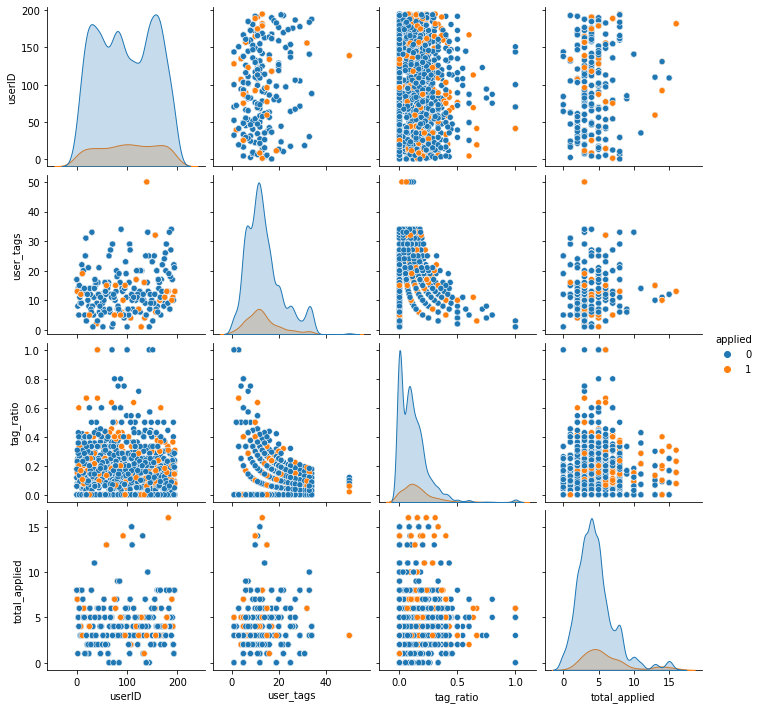

In [239]:
# 각 특징값의 분포와 상관관계를 히스토그램과 스캐터플롯으로 나타낸다.
sns.pairplot(sorted_train.loc[:,['userID','user_tags','tag_ratio','total_applied','applied']], hue='applied')
plt.show()


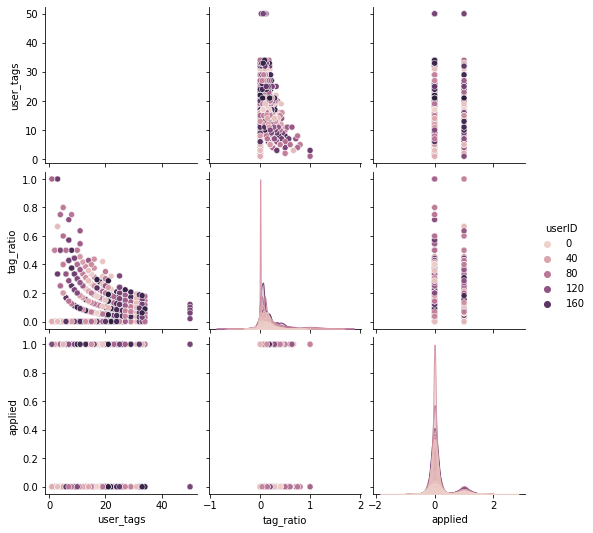

In [183]:
sns.pairplot(sorted_train.loc[:,['userID','user_tags','tag_ratio','applied']], hue='userID')
plt.show()


In [224]:
applied = train.groupby(['userID','tag_ratio'], as_index=False).sum()
# 태그가 안겹쳐도 지원하고..;ㅅ; 이거 뭐...
applied

,userID,tag_ratio,applied,companySize_1-10,companySize_1000 이상,companySize_101-200,companySize_11-50,companySize_201-500,companySize_501-1000,companySize_51-100
0,0004289ee1c7b8b08c77e19878106ae3,0.000000,1,1,0,0,5,2,0,1
1,0004289ee1c7b8b08c77e19878106ae3,0.058824,3,0,0,3,6,0,0,1
2,0004289ee1c7b8b08c77e19878106ae3,0.117647,1,0,0,0,3,0,0,0
3,0004289ee1c7b8b08c77e19878106ae3,0.176471,3,0,0,0,8,0,0,1
4,00dd1479a58930a357e7b4e2ab4c9f33,0.076923,1,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
877,fe292163d06253b716e9a0099b42031d,0.000000,0,1,0,0,3,1,0,0
878,fe292163d06253b716e9a0099b42031d,0.076923,6,1,0,1,12,2,0,0
879,fe292163d06253b716e9a0099b42031d,0.153846,0,0,0,0,0,0,0,1
880,fe292163d06253b716e9a0099b42031d,0.230769,1,0,0,0,1,1,0,0


C:\Users\jeong\.conda\envs\py36-jupyter\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jeong\.conda\envs\py36-jupyter\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jeong\.conda\envs\py36-jupyter\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\jeong\.conda\envs\py36-jupyter\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0, flags=flags)


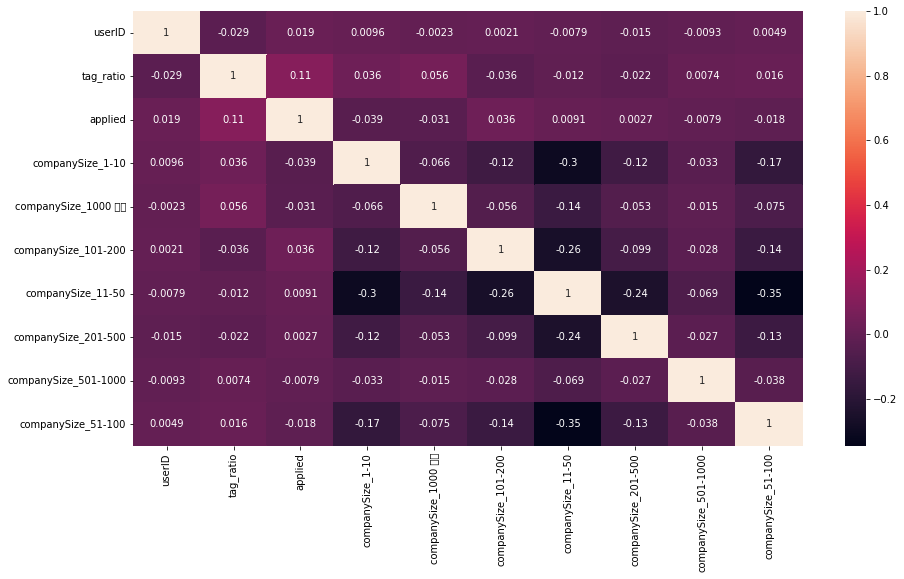

In [184]:
plt.figure(figsize=(15,8))
sns.heatmap(sorted_train.corr(), annot=True)
plt.show()

In [ ]:
# 우선 전체 데이터로 학습..

In [240]:
y_train = sorted_train['applied']
X_train = sorted_train.drop(columns=['applied','userID'])

In [241]:
y_train

index
0       0
1       0
2       1
3       0
4       0
       ..
5995    0
5996    0
5997    0
5998    0
5999    0
Name: applied, Length: 6000, dtype: int64

In [242]:
X_train

,user_tags,tag_ratio,total_applied,companySize_1-10,companySize_1000 이상,companySize_101-200,companySize_11-50,companySize_201-500,companySize_501-1000,companySize_51-100
index,,,,,,,,,,
0,13,0.000000,8,0,0,0,1,0,0,0
1,25,0.040000,0,0,0,1,0,0,0,0
2,7,0.142857,3,0,0,0,0,0,0,0
3,17,0.176471,5,0,0,0,1,0,0,0
4,20,0.050000,4,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
5995,29,0.068966,3,0,0,0,1,0,0,0
5996,25,0.120000,6,0,0,0,0,0,0,1
5997,14,0.142857,11,0,0,1,0,0,0,0


In [127]:
# sorted_train.to_csv('./_data/sorted_train.csv', index_label=False)
# sorted_test.to_csv('./_data/sorted_test.csv', index_label=False)

In [190]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

In [248]:

X_train_split,  X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size=0.3, random_state=1)

forest = RandomForestClassifier(n_estimators=500, random_state=1)
forest.fit(X_train_split, y_train_split)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
feat_labels = X_train.columns[:]

# RFE를 사용하여 우선순위가 높은 특성 5개를 선택하여 훈련
rfe = RFE(forest, n_features_to_select=5)
rfe.fit(X_train_split, y_train_split)
#print(rfe.ranking_)     # 선택한 특성의 우선순위 저장 --> 모델이 선택한 특성은 1로 나타냄
f_mask = rfe.support_
importances = rfe.estimator_.feature_importances_
indices = np.argsort(importances)[::-1]

for i in indices:
    print(f"{i+1:2d} {' '*5} {feat_labels[f_mask][i]} {' '*5} {importances[i]}")
    
score = forest.score(X_test_split, y_test_split)
print(f'모델의 정확도: {score*100:.2f}%')

 2       tag_ratio       0.3429558684385522
 3       total_applied       0.28642821349124037
 1       user_tags       0.2742117943545953
 4       companySize_11-50       0.05905783370386187
 5       companySize_51-100       0.03734629001175027
모델의 정확도: 85.72%


In [250]:
X_train

,user_tags,tag_ratio,total_applied,companySize_1-10,companySize_1000 이상,companySize_101-200,companySize_11-50,companySize_201-500,companySize_501-1000,companySize_51-100
index,,,,,,,,,,
0,13,0.000000,8,0,0,0,1,0,0,0
1,25,0.040000,0,0,0,1,0,0,0,0
2,7,0.142857,3,0,0,0,0,0,0,0
3,17,0.176471,5,0,0,0,1,0,0,0
4,20,0.050000,4,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
5995,29,0.068966,3,0,0,0,1,0,0,0
5996,25,0.120000,6,0,0,0,0,0,0,1
5997,14,0.142857,11,0,0,1,0,0,0,0


In [252]:
test_job

,userID,user_tags,tag_ratio,total_applied,companySize_1-10,companySize_1000 이상,companySize_101-200,companySize_11-50,companySize_201-500,companySize_501-1000,companySize_51-100
0,ebaee1af0c501f22ddfe242fc16dae53,13,0.230769,5,0,0,0,1,0,0,0
1,9ab05403ac7808cbfba3da26665f7a9c,12,0.083333,2,0,0,0,0,0,0,1
2,33349e909eba71677299d2fc97e158b7,6,0.166667,8,0,0,0,1,0,0,0
3,ac985a9db5faeb44c94a334430ccc241,5,0.000000,0,0,0,0,1,0,0,0
4,d41e0e6f6f1e29098d9d152511503ab2,11,0.000000,8,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2430,01ed443356f762e9132b58f8c80e131d,14,0.000000,5,0,0,0,0,1,0,0
2431,946aa0c612952da8d67dd338a43d5929,6,0.333333,5,0,0,0,0,0,0,0
2432,ce840aa9583592e71f3db26ee6e41703,17,0.117647,8,0,0,0,1,0,0,0
2433,946aa0c612952da8d67dd338a43d5929,6,0.166667,5,0,0,0,1,0,0,0


In [254]:
test_job = test_job.drop(['userID'], axis=1)

In [259]:
forest.fit(X_train, y_train)
prediction = forest.predict(test_job)

In [269]:
submission = pd.DataFrame({'applied':prediction})
submission.to_csv('./_data/submission.csv', index=False)

In [396]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.utils.fixes import loguniform
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [288]:
svc =  SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
pipe_svc = make_pipeline(StandardScaler(), svc)
pipe_svc.fit(X_train,y_train)
#print(pipe_svc.score(X_test_split, y_test_split))

0.8694444444444445


In [289]:
prediction = pipe_svc.predict(test_job)
submission = pd.DataFrame({'applied':prediction})
submission.to_csv('./_data/211211_submission(svc).csv', index=False)
#85.48939082819986

In [293]:
X_d=X_train.drop(columns=['user_tags'], axis=1)
test_d = test_job.drop(columns=['user_tags'], axis=1)
pipe_svc.fit(X_d,y_train)
prediction = pipe_svc.predict(test_d)
submission = pd.DataFrame({'applied':prediction})
submission.to_csv('./_data/211211_submission(svc_d).csv', index=False)
#85.62628336755647

In [296]:
X_r=X_train.iloc[:,[1,2]]
test_r=test_job.iloc[:,[1,2]]
pipe_svc.fit(X_r,y_train)
prediction = pipe_svc.predict(test_r)
submission = pd.DataFrame({'applied':prediction})
submission.to_csv('./_data/211211_submission(svc_r).csv', index=False)
#85.62628336755647